# TP 1 - Introduction au Machine Learning

## Exercice 2 - Régression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Question 1

In [3]:
print(train.head())
print(test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print ('Total missing values', sum(train.isna().sum()))
print ('Total missing values', sum(test.isna().sum()))

Total missing values 6965
Total missing values 7000


/tmp/ipykernel_12632/227343258.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap='coolwarm',annot = True)


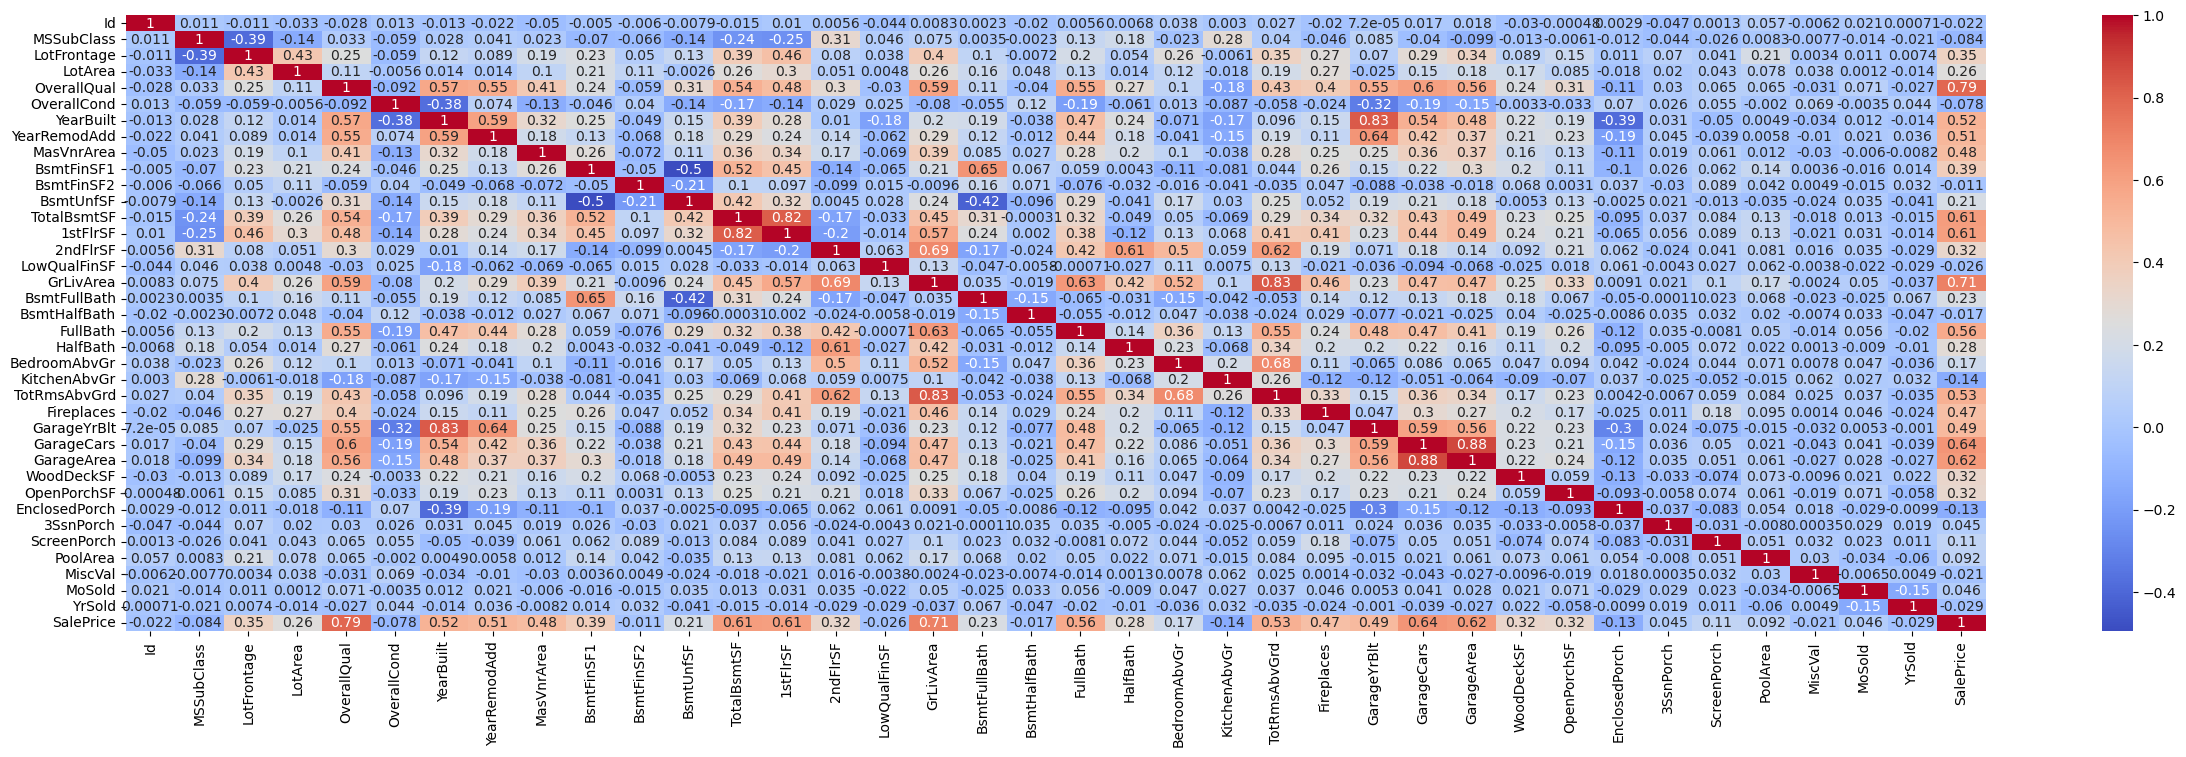

In [6]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
n_cols = train.select_dtypes(include = [np.number])
corr = n_cols.corr()
print ('Les variables avec le plus de correlation:'), print (corr['SalePrice'].sort_values(ascending = False)[:10])
print()
print ('Les variables avec le moins de correlation:'), print (corr['SalePrice'].sort_values(ascending = False)[-5:])

Les variables avec le plus de correlation:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Les variables avec le moins de correlation:
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


(None, None)

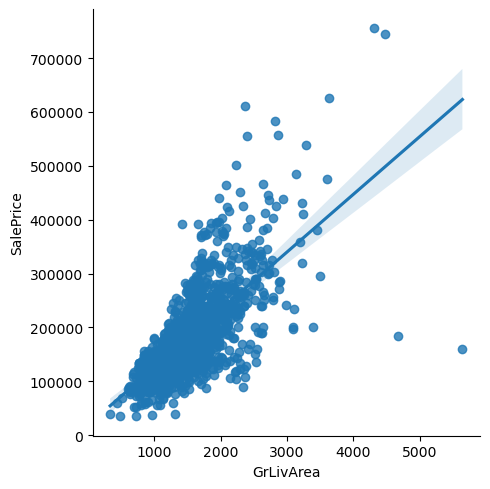

In [9]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

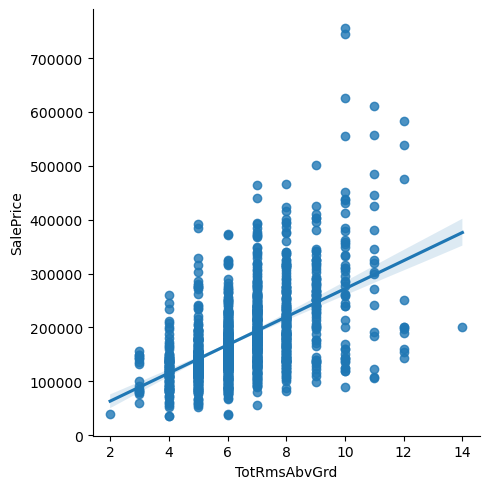

In [10]:
sns.lmplot(x='TotRmsAbvGrd',y='SalePrice',data=train)

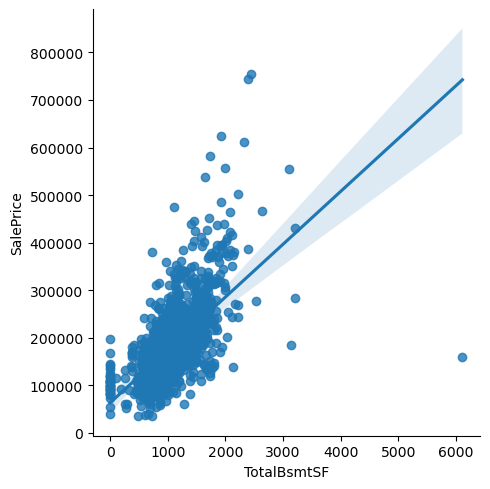

In [11]:
sns.lmplot(x='TotalBsmtSF',y='SalePrice',data=train)

<AxesSubplot: xlabel='GarageCars', ylabel='SalePrice'>

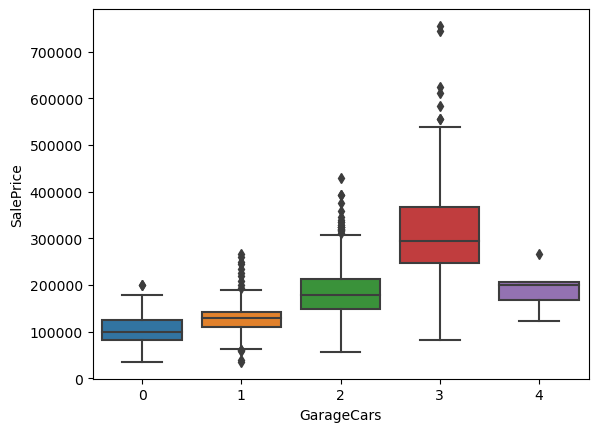

In [12]:
sns.boxplot(x='GarageCars',y='SalePrice',data=train)

In [13]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Question 2

In [14]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [15]:
# On encode les varible non numerique
le = preprocessing.LabelEncoder()
for i in train.columns:
    if train[i].dtypes == 'O':
        train[i] = train[i].astype(str)
        le.fit(train[i])
        train[i] = le.transform(train[i])
        
for i in test.columns:
    if test[i].dtypes == 'O':
        test[i] = test[i].astype(str)
        le.fit(test[i])
        test[i] = le.transform(test[i])
        
test.fillna(test.median(), inplace=True)
train.fillna(test.median(), inplace=True)

#On normalise afin d'avoir des valeurs pour la MSE, MAE et RMSE en 0 et 1
normalized_test=(test-test.mean())/test.std()
normalized_train=(train-train.mean())/train.std()

X = normalized_train.drop(['SalePrice', 'Id'], axis = 1)
y = normalized_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

print ('MAE :', mean_absolute_error(y_test, predictions))
print ('MSE :', mean_squared_error(y_test, predictions))
print ('RMSE :', sqrt(mean_squared_error(y_test, predictions)))
print ('R^2 :', r2_score(y_test, predictions))

MAE : 0.27025809417948443
MSE : 0.18985615247641688
RMSE : 0.43572485868540584
R^2 : 0.8437871779993701


Text(0.5, 1.0, 'Linear Regression Model')

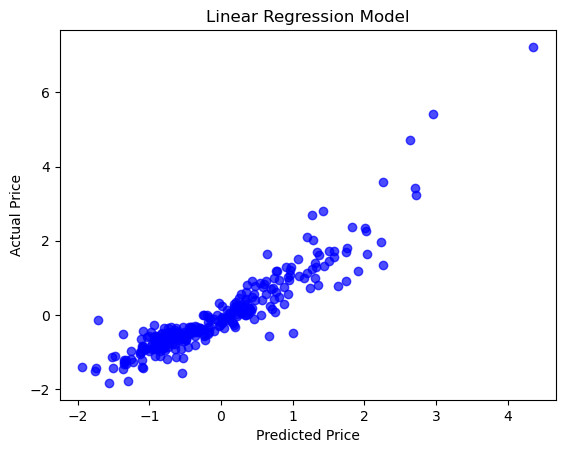

In [16]:
# alpha helps to show overlapping data
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

### Question 3

L'utilisation du LabelEncoder pour encoder des variables catégorielles peut poser des problèmes potentiels dans le contexte de l'apprentissage automatique, notamment en introduisant un ordre implicite, en affectant la distance perçue entre les catégories, en impactant certains algorithmes, et en conduisant à des résultats inappropriés dans le cas de variables avec un grand nombre de catégories uniques. Afin de surmonter ces problèmes, il est recommandé d'explorer d'autres techniques d'encodage plus avancées, telles que le OneHotEncoder ou le TargetEncoder, en fonction des caractéristiques spécifiques du problème et des exigences de l'algorithme utilisé.

### Question 4

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

X = normalized_train.drop(['SalePrice', 'Id'], axis = 1)
y = normalized_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


regressor = DecisionTreeRegressor(random_state=0)
model = regressor.fit(X_train, y_train)
predictions = model.predict(X_test)


print ('MAE :', mean_absolute_error(y_test, predictions))
print ('MSE :', mean_squared_error(y_test, predictions))
print ('RMSE :', sqrt(mean_squared_error(y_test, predictions)))
print ('R^2 :', r2_score(y_test, predictions))

MAE : 0.3587405424191604
MSE : 0.3040789738980683
RMSE : 0.5514335625422779
R^2 : 0.7498051340233838


Text(0.5, 1.0, 'Linear Regression Model')

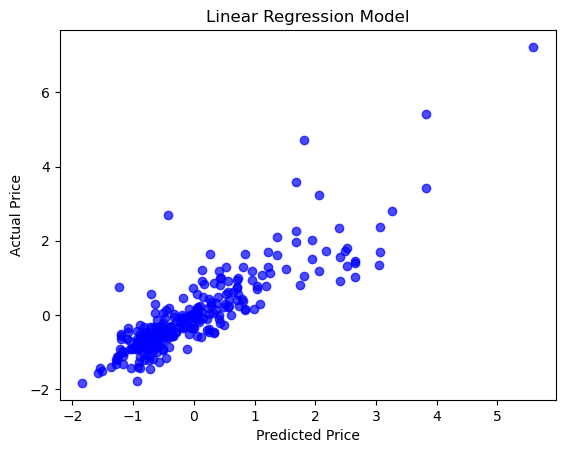

In [18]:
# alpha helps to show overlapping data
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

In [19]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = normalized_train.drop(['SalePrice', 'Id'], axis = 1)
y = normalized_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model = reg.fit(X_train, y_train)

predictions = model.predict(X_test)


print ('MAE :', mean_absolute_error(y_test, predictions))
print ('MSE :', mean_squared_error(y_test, predictions))
print ('RMSE :', sqrt(mean_squared_error(y_test, predictions)))
print ('R^2 :', r2_score(y_test, predictions))


MAE : 0.27727737292884197
MSE : 0.30619788875951265
RMSE : 0.5533515056087881
R^2 : 0.7480617000299745


Text(0.5, 1.0, 'Linear Regression Model')

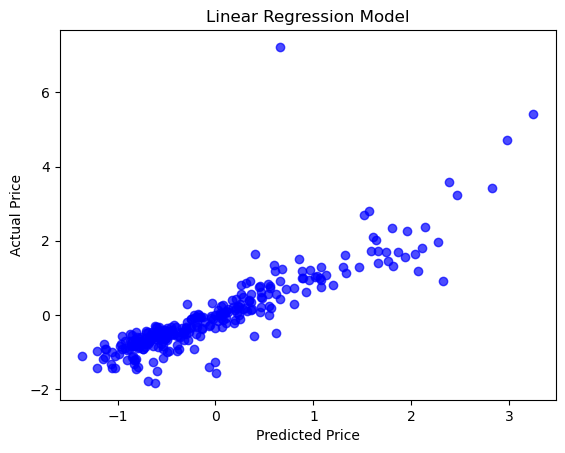

In [20]:
# alpha helps to show overlapping data
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

### Question 5

On utilise la MAE, MSE, RMSE et le R^2 comme vu dans le cours afin de tester les modèle de régression.
Les trois modèles sont pas ouf meme si le premier modèle à un haut score pour R^2. Normalement quand une regression est bonne, on doit avoir les points qui suivent une diagonale comme dans l'exemple suivant :

MAE : 0.715538705845882
MSE : 0.8717009266792214
RMSE : 0.933649252492188
R^2 : 0.9974963747345793


Text(0.5, 1.0, 'Linear Regression Model')

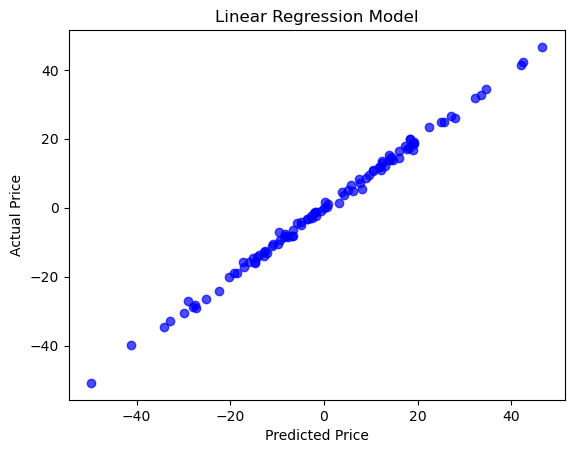

In [21]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=500, n_features=2, noise=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
print ('MAE :', mean_absolute_error(y_test, predictions))
print ('MSE :', mean_squared_error(y_test, predictions))
print ('RMSE :', sqrt(mean_squared_error(y_test, predictions)))
print ('R^2 :', r2_score(y_test, predictions))

# alpha helps to show overlapping data
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')